# CSE158 HW2 - Nicolas Carmont Zaragoza (A15677088)

TASK 1 - CLASSIFIER EVALUATION

Q1) Split data equally and randomly into training, validation and test tests. After training on the training set, report the accurracy of the classifier on the validation and test sets.

In [7]:
import numpy
from urllib.request import urlopen
import scipy.optimize
import random
from math import exp
from math import log

#def parseData(fname):
  #for l in urlopen(fname):
   # yield eval(l)

print("Reading data...")
#data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
import urllib.request
def parseData(fname):
	for l in urllib.request.urlopen(fname):
		yield eval(l)
data = list(parseData("http://jmcauley.ucsd.edu/cse258/data/beer/beer_50000.json"))
print("done")

def feature(datum):
  feat = [1, datum['review/taste'], datum['review/appearance'], datum['review/aroma'], datum['review/palate'], datum['review/overall']]
  return feat

X = [feature(d) for d in data]
y = [d['beer/ABV'] >= 6.5 for d in data]

def inner(x,y):
  return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
  return 1.0 / (1 + exp(-x))

##################################################
# Logistic regression by gradient ascent         #
##################################################

# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
  loglikelihood = 0
  for i in range(len(X)):
    logit = inner(X[i], theta)
    loglikelihood -= log(1 + exp(-logit))
    if not y[i]:
      loglikelihood -= logit
  for k in range(len(theta)):
    loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
  # print("ll =" + str(loglikelihood))
  return -loglikelihood

# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
  dl = [0]*len(theta)
  for i in range(len(X)):
    logit = inner(X[i], theta)
    for k in range(len(theta)):
      dl[k] += X[i][k] * (1 - sigmoid(logit))
      if not y[i]:
        dl[k] -= X[i][k]
  for k in range(len(theta)):
    dl[k] -= lam*2*theta[k]
  return numpy.array([-x for x in dl])

randXY = list(zip(X, y))
random.shuffle(randXY)
randX = list()
randY=list()
randX[:], randY[:] = zip(*randXY)


X_train = randX[:16666]
#print("length of xtrn1:" + str(len(X_train)) + "\n")
X_valid = randX[:33333]
X_valid = X_valid[16666:]
#print("length of xtrn2:" + str(len(X_train)) + "\n")
X_test = randX[33333:]
#print("length of xtrn3:" + str(len(X_train)) + "\n")

Y_train = randY[:16666]
#print("length of xtrn1:" + str(len(X_train)) + "\n")
Y_valid = randY[:33333]
Y_valid = Y_valid[16666:]
#print("length of xtrn2:" + str(len(X_train)) + "\n")
Y_test = randY[33333:]
#print("length of xtrn3:" + str(len(X_train)) + "\n")


##################################################
# Train                                          #
##################################################

def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X_train[0]), fprime, pgtol = 10, args = (X_train, Y_train, lam))
  return theta

##################################################
# Predict                                        #
##################################################

def performance(theta):
  scores = [inner(theta,x) for x in X_train]
  # print(scores[10000:])
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,Y_train)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc

def performanceTst(theta):
  scores = [inner(theta,x) for x in X_test]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,Y_test)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc

def performanceVal(theta):
  scores = [inner(theta,x) for x in X_valid]
  predictions = [s > 0 for s in scores]
  correct = [(a==b) for (a,b) in zip(predictions,Y_valid)]
  acc = sum(correct) * 1.0 / len(correct)
  return acc

##################################################
# Validation pipeline                            #
##################################################

lam = 1.0
theta = train(lam)
accTrn = performance(theta)
accVal = performanceVal(theta)
accTst = performanceTst(theta)

print("lambda = " + str(lam) + ":\t trnaccuracy=" + str(accTrn))
print("lambda = " + str(lam) + ":\t vaccuracy=" + str(accVal))
print("lambda = " + str(lam) + ":\t tstaccuracy=" + str(accTst))

Reading data...
done
lambda = 1.0:	 trnaccuracy=0.7199087963518541
lambda = 1.0:	 vaccuracy=0.7188456230875383
lambda = 1.0:	 tstaccuracy=0.7172856542869143


The above classifier gives the following results for accuracy on the training, validation and test data sets for a hyperparameter of lambda = 1.0:

Training data Accuracy = 0.7234489379575183
Validation data Accuracy = 0.7151256974860503
Training data Accuracy = 0.7177656446871062

As these accuracy values are very similiar between sets, this may suggest that our model is not overfitting (or that it generalises well to new data). Noenetheless we may be undefitting and the model may be too general as an accuracy of 0.7 isn't very accurate, which we may test in the following Question.

Q2.) Report the number of Positives, Negatives, True Positives, True Negatives, True Negatives, False Positives and False Negatives using the test set of the classifier.

In [8]:
def positives(theta):
    posN = sum(Y_test)
    return posN

def negatives(theta):
    correct = [(a==False) for a in Y_test]
    negN = sum(correct)
    return negN

def truePositives(theta):
    scores = [inner(theta,x) for x in X_test]
    predictions = [s > 0 for s in scores]
    correct = [((a==True) & (b==True)) for (a,b) in zip(predictions,Y_test)]
    tPos = sum(correct)
    return tPos

def falsePositives(theta):
    scores = [inner(theta,x) for x in X_test]
    predictions = [s > 0 for s in scores]
    correct = [((a==True) & (b==False)) for (a,b) in zip(predictions,Y_test)]
    fPos = sum(correct)
    return fPos

def trueNegatives(theta):
    scores = [inner(theta,x) for x in X_test]
    predictions = [s > 0 for s in scores]
    correct = [((a==False) & (b==False)) for (a,b) in zip(predictions,Y_test)]
    tNeg = sum(correct)
    return tNeg

def falseNegatives(theta):
    scores = [inner(theta,x) for x in X_test]
    predictions = [s > 0 for s in scores]
    correct = [((a==False) & (b==True)) for (a,b) in zip(predictions,Y_test)]
    fNeg = sum(correct)
    return fNeg

N = negatives(theta)
P = positives(theta)
Tot= positives(theta)+negatives(theta)

FN = falseNegatives(theta)
TP = truePositives(theta)
TotP = falseNegatives(theta)+truePositives(theta)

FP = falsePositives(theta)
TN = trueNegatives(theta)
TotN =falsePositives(theta)+trueNegatives(theta)

print("Neg:"+str(N))
print("Pos:"+str(P))
print("Total:"+str(Tot)+"\n")

print("False Neg:"+str(FN))
print("True Pos:"+str(TP))
print("Total Pos(FN+TP):"+str(FN+TP)+"\n")

print("False Pos:"+str(FP))
print("True Neg:"+str(TN))
print("Total Neg(FP+TN):"+str(FP + TN)+"\n")



Neg:6218
Pos:10449
Total:16667

False Neg:1421
True Pos:9028
Total Pos(FN+TP):10449

False Pos:3291
True Neg:2927
Total Neg(FP+TN):6218



Above are the reported statistics.
Checking that the total amount of Negatives is equal to FP + TN and that Positives is equal to FP + TP, we see that both are correct.


Q3.) Report the Precision, Recall, the Precision@100 and the Recall@100 of the classifier.

In [9]:
Precision = TP/(TP+FP)   #num of relevant reccomended items/ reccomended items

Recall =  TP/(FN+TP)  #num of relevant reccomended items/ relevant items

print("Precision: "+str(Precision))
print("Recall: "+str(Recall))


def precisionAtK(k,theta):
    scores = [inner(theta,x) for x in X_test]
    s=sorted(zip(scores, Y_test))
    sortScore,sortY = zip(*s)
    sortScore = list(sortScore)
    sortY = list(sortY)
    sortScore.reverse()
    sortY.reverse()
    #print(sortScore)
    sortY = sortY[:k]
    
    predictions = [s > 0 for s in sortScore[:k]]
    
    #TP 
    TP1 = [((a==True) & (b==True)) for (a,b) in zip(predictions,sortY[:k])]
    tTP = sum(TP1)
    
    #FP 
    FP1 = [((a==True) & (b==False)) for (a,b) in zip(predictions,sortY[:k])]
    tFP = sum(FP1)
    
    denom = tFP+tTP
    if (denom ==0):
        denom =1
    prec = tTP/(denom)
    return prec


def recallAtK(k,theta):
    scores = [inner(theta,x) for x in X_test]
    s=sorted(zip(scores, Y_test))
    sortScore,sortY = zip(*s)
    sortScore = list(sortScore)
    sortY = list(sortY)
    sortScore.reverse()
    sortY.reverse()
    #print(sortScore)
    sortY = sortY[:k]
    
    
    predictions = [s > 0 for s in sortScore[:k]]
    #print(predictions)
    
    #TP 
    TP1 = [((a==True) & (b==True)) for (a,b) in zip(predictions,sortY)]
    tTP = sum(TP1)
    
    #FN 
    FN1 = [((a==False) & (b==True)) for (a,b) in zip(predictions,sortY)]
   # print(predictions)
    tFN = sum(FN1)
    #print(tFN)
    
    denom = TotP+TotN
    rec = tTP/(denom)
    return rec

k =100

print("Precision@k="+str(k)+ ": " + str(precisionAtK(k,theta)))
print("Recall@k="+str(k)+ ": " + str(recallAtK(k,theta)))


Precision: 0.7328516925075087
Recall: 0.8640061249880371
Precision@k=100: 0.94
Recall@k=100: 0.005639887202255955


The above values were acheieved for Precision and Recall.


Q4.) Using a plotting library generate a precision/recall curve from your classifier

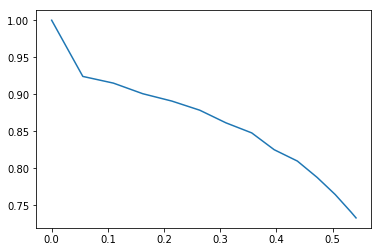

In [10]:
import matplotlib.pyplot as plt
precisionVals = [precisionAtK(n,theta) for n in range(1,len(Y_test),1000)]     #len(Y_test)+1)]
recallVals = [recallAtK(n,theta) for n in range(1,len(Y_test),1000)]          #len(Y_test)+1)]
plt.plot(recallVals, precisionVals)
plt.show()

This data gave a relationship where the higher the recall, the lower the precision.

TASK2 - COMMUNITY DETECTION

Q5.) Amount of connected components in the Facebook ego-network data graph and amount of nodes in the largest connected component

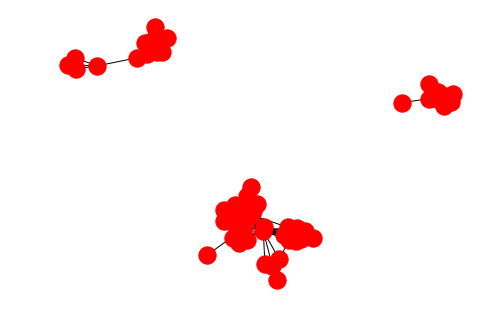

There are 3 connected components
Nodes in largest connected component: 40


<Figure size 432x288 with 0 Axes>

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

y = open("egonet.txt")
nodes1 = list()
nodes2 = list()
for edges in y:
    split1,split2 = edges.split()
    nodes1.append(split1)
    nodes2.append(split2)
nodesFb = list(zip(nodes1,nodes2))

edges = set()
nodes = set()

for edge in nodesFb:
    x,y = edge[0],edge[1]
    x,y = int(x),int(y)
    edges.add((x,y))
    edges.add((y,x))
    nodes.add(x)
    nodes.add(y)

G = nx.Graph()
for e in edges:
    G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()

connectedComp = nx.number_connected_components(G)
print("There are " +str(connectedComp)+" connected components")

connectedComponentSubGraphs= nx.connected_component_subgraphs(G)
maxConnectedComponent = max(connectedComponentSubGraphs, key=len)
maxNodes = len(maxConnectedComponent)
print("Nodes in largest connected component: " +str(maxNodes))

Q6.) Normalised-cut cost of the 50/50 split found above

In [12]:
sortedNodes = list(maxConnectedComponent.nodes)
sortedNodes.sort()

nodesSplit1 = sortedNodes[:20]
nodesSplit2 = sortedNodes[20:]

cuts = 0
edgesCounter1=0
edgesCounter2=0

for edge in maxConnectedComponent.edges:   # count cuts
    x,y = edge[0],edge[1]
    x,y = int(x),int(y)
    if(((x in nodesSplit1) & (y in nodesSplit2)) | ((x in nodesSplit2) & (y in nodesSplit1))):
        cuts+=1
    if ((x in nodesSplit1) & (y in nodesSplit1)):
        edgesCounter1+=2
    if ((x in nodesSplit2) & (y in nodesSplit2)):
        edgesCounter2+=2
        
        
normalisedCutCost = (1/2)*cuts*((1/edgesCounter1)+(1/edgesCounter2))
print("normalised Cut Cost: "+ str(normalisedCutCost))


normalised Cut Cost: 0.74062893081761


Q7.) Find the elements of the split using the greedy algorithm and find its normalised cut cost.

In [19]:
finalSet1 = nodesSplit1
finalSet2 = nodesSplit2
def normalisedCutCoster(n1,n2): 
    cuts=0
    edgesCounter1=1
    edgesCounter2=1
    for edge in maxConnectedComponent.edges:   # count cuts
        x,y = edge[0],edge[1]
        x,y = int(x),int(y)
        if(((x in  n1) & (y in n2)) | ((x in n1) & (y in n2))):
            cuts+=1
        if ((x in n1) & (y in n1)):
            edgesCounter1+=2
        if ((x in n2) & (y in n2)):
            edgesCounter2+=2
            
        nCutCost = (1/2)*cuts*((1/edgesCounter1)+(1/edgesCounter2))
        return nCutCost

prevCut=normalisedCutCoster(finalSet1,finalSet2)

for i in range(1,100000):
    set1 = list(finalSet1)
    set2 = list(finalSet2)
    a = set1[-1]
    set2.append(a)
    set1.pop()
    if (normalisedCutCoster(set1,set2)>prevCut):
        a = set2[-1]
        set1.insert(0,a)
        set2.pop()
        
        a = set2[-1]
        set1.append(a)
        set2.pop()
        
        if (normalisedCutCoster(set1,set2)>prevCut):
            break
    else:
        prevCut =normalisedCutCoster(set1,set2)
        
print("Local Minimum normalised cut sets:")
print("set1: " + str(set1))
print("set2: " + str(set2))

Local Minimum normalised cut sets:
set1: [697, 703, 708, 713, 719, 729, 745, 747, 753, 769, 772, 774, 798, 800, 803, 804, 805, 810, 811]
set2: [823, 825, 828, 830, 840, 856, 861, 863, 864, 869, 876, 878, 880, 882, 884, 886, 888, 889, 890, 893, 819]


Q8.) Reimplement the greedy algorithm to instead maximise modularity

In [ ]:
fSet1 = nodesSplit1
fSet2 = nodesSplit2

def modularity(n1,n2): 
    cuts=0
    ekk1=0
    ekk2=0
    ak1=0
    ak2=0
    for edge in maxConnectedComponent.edges:   # count cuts
        if ((x in n1) & (y in n1)):
            ekk1+=1
        if ((x in n2) & (y in n2)):
            ekk2+=1
    ak1 = len(n1)/(len(n1)+len(n2))
    ak2 = len(n2)/(len(n1)+len(n2))
    ekk1= ekk1/(ekk1+ekk2) 
    ekk2 = ekk2/(ekk1+ekk2) 
    mod = (ekk1-ak1**2)+(ekk2-ak2**2)
    return mod

modl=modularity(fSet1,fSet2)

for i in range(1,100000):
    set1 = list(fSet1)
    set2 = list(fSet2)
    a = set1[-1]
    set2.append(a)
    set1.pop()
    if (modularity(set1,set2)>modl):
        a = set2[-1]
        set1.insert(0,a)
        set2.pop()
        
        a = set2[-1]
        set1.append(a)
        set2.pop()
        
        if (modularity(set1,set2)>modl):
            break
    else:
        modl =modularity(set1,set2)
        
print("Local Minimum normalised cut sets:")
print("set1: " + str(set1))
print("set2: " + str(set2))
    